In [1]:
from deap import creator, base, tools, algorithms
import numpy
import random
import matplotlib.pyplot as plt
from Backpack import Backpack

gen	nevals	max	avg  
0  	100   	910	625.4
1  	78    	950	756.11
2  	79    	1030	812.96
3  	84    	1030	877.73
4  	77    	1030	915.52
5  	79    	1030	949.82
6  	76    	1060	980.94
7  	91    	1060	987.93
8  	88    	1065	1001.97
9  	83    	1065	1009.52
10 	85    	1065	1025.21
11 	89    	1077	1042.16
12 	89    	1077	1042.84
13 	84    	1077	1056.38
14 	90    	1077	1051.56
15 	84    	1077	1058.38
16 	89    	1077	1068.86
17 	80    	1077	1064   
18 	84    	1077	1069.95
19 	82    	1077	1065.34
20 	88    	1077	1068.78
21 	81    	1077	1065.35
22 	89    	1077	1071.22
23 	78    	1077	1076.43
24 	73    	1077	1073.71
25 	74    	1077	1069.52
26 	91    	1077	1073.53
27 	77    	1077	1074.93
28 	85    	1077	1067.59
29 	81    	1077	1069.52
30 	74    	1077	1066.59
31 	78    	1077	1072.69
32 	87    	1077	1063.5 
33 	79    	1077	1074.66
34 	87    	1077	1074.44
35 	80    	1077	1074.28
36 	84    	1077	1069.39
37 	89    	1077	1076.05
38 	85    	1077	1073.87
39 	85    	1077	1070.78
40 	80    	1077	1071.73
41 	78

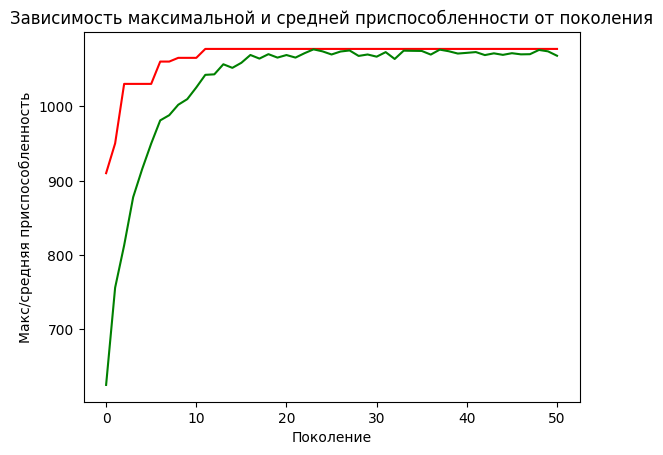

--Что в рюкзак положить?--
Добавлено карта: вес 9, ценность 150. Суммарный вес 9, суммарная ценность 150
Добавлено компас: вес 13, ценность 35. Суммарный вес 22, суммарная ценность 185
Добавлено вода: вес 153, ценность 200. Суммарный вес 175, суммарная ценность 385
Добавлено бутерброд: вес 50, ценность 160. Суммарный вес 225, суммарная ценность 545
Добавлено глюкоза: вес 15, ценность 60. Суммарный вес 240, суммарная ценность 605
Добавлено банка: вес 68, ценность 45. Суммарный вес 308, суммарная ценность 650
Добавлено банан: вес 27, ценность 60. Суммарный вес 335, суммарная ценность 710
Добавлено яблоко: вес 39, ценность 40. Суммарный вес 374, суммарная ценность 750
Добавлено сыр: вес 23, ценность 30. Суммарный вес 397, суммарная ценность 780
Сборка завершена. Общий вес 397, общая ценность груза 780
Общий список рекомендуемых предметов: карта, компас, вода, бутерброд, глюкоза, банка, банан, яблоко, сыр, 


In [2]:
ONE_MAX_LENGTH = 100
POPULATION_SIZE=100
P_CROSSOVER=0.8
P_MUTATION=0.1
MAX_GENERATIONS=50
HALL_OF_FAME_SIZE = 10

backpack = Backpack()

RANDOM_SEED = random.randint(0,100)
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

toolbox.register("zeroOrOne", random.randint, 0, 1)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))

creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("individualCreator", tools.initRepeat, creator.Individual, 
                 toolbox.zeroOrOne, len(backpack))

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def backpackValue(individual):
    return backpack.getValue(individual)

toolbox.register("evaluate", backpackValue)
toolbox.register("select", tools.selTournament, tournsize = 3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb = 1.0/len(backpack))

def main():
    
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)
    
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    
    population, logbook = algorithms.eaSimple(population,toolbox,
                                             cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                             ngen=MAX_GENERATIONS, halloffame= hof,
                                             stats=stats, verbose=True)
    
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")
    
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color = "green")
    plt.xlabel('Поколение')
    plt.ylabel('Макс/средняя приспособленность')
    plt.title('Зависимость максимальной и средней приспособленности от поколения')
    plt.show()
        
    best = hof.items[0]
    print("--Что в рюкзак положить?--")
    backpack.printItems(best)
    
    
if __name__ == "__main__":
    main()